In [28]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

First we load the digits dataset from sklearn.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.


In [4]:
digits = datasets.load_digits()

We can grab and 2d image array for the first data point and view it with imshow

In [23]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

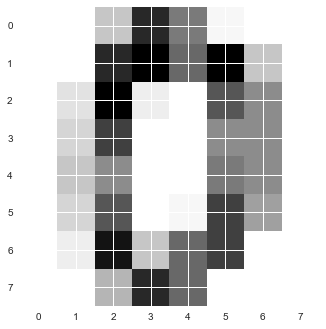

In [18]:
digit1 = digits['images'][0]
plt.imshow(digit1)

And we find that the target for this image is a 0, as expected.

In [19]:
digits['target'][0]

0

We extract our features and target variable.

In [25]:
X = digits.data
y = digits.target

In [32]:
X.size

115008

We split our 115008 data points into training and testing data with 20% of the data used to testing and using a random_state seed of 42.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We fit a KNN classifier with 7 neighbours.

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [35]:
accuracy = knn.score(X_test, y_test)
print("Accuracy = {:.1f}%".format(accuracy*100))

Accuracy = 98.3%


We find that this classifier is 98.3% accurate, that's pretty good.

We will now check the complexity curve for this k-NN classifier applied to this data.

In [37]:
neighbours = np.arange(1, 9)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

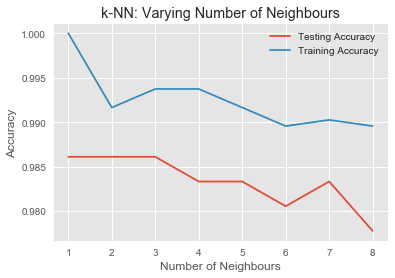

In [41]:
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbours, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbours, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()